In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [15]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [16]:
# Create a practice set of random latitude and longitude combinations.
x = [25.12903645, 25.92017388, 26.62509167, -59.98969384, 37.30571269]
y = [-67.59741259, 11.09532135, 74.84233102, -76.89176677, -61.13376282]
coordinates = zip(x, y)

In [17]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(coordinate[0], coordinate[1])

25.12903645 -67.59741259
25.92017388 11.09532135
26.62509167 74.84233102
-59.98969384 -76.89176677
37.30571269 -61.13376282


In [18]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [19]:
# Use the citipy module to determine city based on latitude and longitude.
from citipy import citipy

In [20]:
# Use the tuple() function to display the latitude and longitude combinations.
for coordinate in coordinates:
    print(citipy.nearest_city(coordinate[0], coordinate[1]).city_name,
          citipy.nearest_city(coordinate[0], coordinate[1]).country_code)

mataura pf
conceicao do araguaia br
katsuura jp
port elizabeth za
sentyabrskiy ru
vaini to
vaini to
bluff nz
kruisfontein za
clyde river ca
flinders au
busselton au
herat af
grand river south east mu
jamestown sh
attawapiskat ca
punta arenas cl
nara ml
talnakh ru
flinders au
vaitupu wf
jamestown sh
amderma ru
ewo cg
kapaa us
ribeira grande pt
saint-pierre pm
bluff nz
thompson ca
bredasdorp za
provideniya ru
barrow us
mar del plata ar
henties bay na
lorengau pg
albany au
roald no
tambopata pe
albany au
karratha au
hobart au
luderitz na
westport nz
mudgee au
ribeira grande pt
comodoro rivadavia ar
arraial do cabo br
rikitea pf
san rafael ar
new norfolk au
lebu cl
tartki tj
krasnoselkup ru
chokurdakh ru
aripuana br
hilo us
hermanus za
hermanus za
yellowknife ca
sitka us
mataura pf
oyama jp
gombong id
port hardy ca
khasan ru
mataura pf
molepolole bw
isangel vu
geraldton au
jamestown sh
dikson ru
taolanaro mg
luwuk id
qaanaaq gl
houston ca
ushuaia ar
puerto ayora ec
port alfred za
ponta do 

saldanha za
cape town za
svetlogorsk ru
barrow us
charagua bo
maumere id
flinders au
mar del plata ar
mataura pf
waingapu id
albany au
port pirie au
uvira cd
vestmannaeyjar is
lebu cl
kruisfontein za
port alfred za
adelaide au
macae br
ngukurr au
bredasdorp za
kanye bw
barrow us
ponta delgada pt
sretensk ru
ushuaia ar
bluff nz
vila velha br
pisco pe
cape town za
amderma ru
ushuaia ar
buraydah sa
tiksi ru
belle fourche us
srednekolymsk ru
port-gentil ga
rikitea pf
clyde river ca
pacific grove us
wahran dz
george town ky
butaritari ki
marv dasht ir
bambous virieux mu
kudahuvadhoo mv
yellowknife ca
bluff nz
busselton au
rungata ki
bredasdorp za
avarua ck
atuona pf
zlitan ly
atuona pf
tautira pf
thompson ca
luderitz na
okhotsk ru
jamestown sh
ibra om
sairang in
hobart au
busselton au
ancud cl
standerton za
togur ru
bumba cd
gamba ga
grand gaube mu
ballina au
copiapo cl
ushuaia ar
cape town za
hermanus za
mataura pf
kaitangata nz
cabo san lucas mx
ponta do sol pt
lebu cl
pokhara np
ushuaia 

In [21]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

624

In [22]:
import requests
from config import weather_api_key

In [23]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb3c5fccb85679aa1e9bb430e51074fe


In [24]:
# Create an endpoint URL for a city.
city_url = url + "&q=" + "Boston"
print(city_url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=cb3c5fccb85679aa1e9bb430e51074fe&q=Boston


In [25]:
# Import the time library and the datetime module from the datetime library 
import time
from datetime import datetime

In [28]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1

# Loop through all the cities in our list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
        time.sleep(60)

    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")
    
       # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
    # Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

    
  

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | mataura
Processing Record 2 of Set 1 | conceicao do araguaia
Processing Record 3 of Set 1 | katsuura
Processing Record 4 of Set 1 | port elizabeth
Processing Record 5 of Set 1 | sentyabrskiy
City not found. Skipping...
Processing Record 6 of Set 1 | vaini
Processing Record 7 of Set 1 | bluff
Processing Record 8 of Set 1 | kruisfontein
Processing Record 9 of Set 1 | clyde river
Processing Record 10 of Set 1 | flinders
Processing Record 11 of Set 1 | busselton
Processing Record 12 of Set 1 | herat
Processing Record 13 of Set 1 | grand river south east
City not found. Skipping...
Processing Record 14 of Set 1 | jamestown
Processing Record 15 of Set 1 | attawapiskat
City not found. Skipping...
Processing Record 16 of Set 1 | punta arenas
Processing Record 17 of Set 1 | nara
Processing Record 18 of Set 1 | talnakh
Processing Record 19 of Set 1 | vaitupu
City not found. Skipping...
Processing Record 20

Processing Record 37 of Set 4 | havre-saint-pierre
Processing Record 38 of Set 4 | inirida
Processing Record 39 of Set 4 | upernavik
Processing Record 40 of Set 4 | kokkola
Processing Record 41 of Set 4 | thinadhoo
Processing Record 42 of Set 4 | zharkent
Processing Record 43 of Set 4 | cap-aux-meules
Processing Record 44 of Set 4 | bowen
Processing Record 45 of Set 4 | antalaha
Processing Record 46 of Set 4 | kaitangata
Processing Record 47 of Set 4 | avila
Processing Record 48 of Set 4 | port lincoln
Processing Record 49 of Set 4 | srednekolymsk
Processing Record 50 of Set 4 | khatanga
Processing Record 1 of Set 5 | artsvanist
Processing Record 2 of Set 5 | bull savanna
Processing Record 3 of Set 5 | barentsburg
City not found. Skipping...
Processing Record 4 of Set 5 | rizhao
Processing Record 5 of Set 5 | olafsvik
Processing Record 6 of Set 5 | constitucion
Processing Record 7 of Set 5 | la rioja
Processing Record 8 of Set 5 | carnarvon
Processing Record 9 of Set 5 | tomatlan
Proce

Processing Record 27 of Set 8 | barmer
Processing Record 28 of Set 8 | along
Processing Record 29 of Set 8 | peoria
Processing Record 30 of Set 8 | kathu
Processing Record 31 of Set 8 | kamenka
Processing Record 32 of Set 8 | gillette
Processing Record 33 of Set 8 | carballo
Processing Record 34 of Set 8 | solsvik
City not found. Skipping...
Processing Record 35 of Set 8 | potiskum
Processing Record 36 of Set 8 | cayenne
Processing Record 37 of Set 8 | anadyr
Processing Record 38 of Set 8 | sept-iles
Processing Record 39 of Set 8 | caravelas
Processing Record 40 of Set 8 | te anau
Processing Record 41 of Set 8 | el alto
Processing Record 42 of Set 8 | beringovskiy
Processing Record 43 of Set 8 | omboue
Processing Record 44 of Set 8 | mangrol
Processing Record 45 of Set 8 | vostok
Processing Record 46 of Set 8 | leningradskiy
Processing Record 47 of Set 8 | touros
Processing Record 48 of Set 8 | haines junction
Processing Record 49 of Set 8 | ozernovskiy
Processing Record 50 of Set 8 | 

Processing Record 11 of Set 12 | dzhusaly
City not found. Skipping...
Processing Record 12 of Set 12 | yumen
Processing Record 13 of Set 12 | khuzdar
Processing Record 14 of Set 12 | kjollefjord
Processing Record 15 of Set 12 | boone
Processing Record 16 of Set 12 | rorvik
Processing Record 17 of Set 12 | grenada
Processing Record 18 of Set 12 | smirnykh
Processing Record 19 of Set 12 | mildura
Processing Record 20 of Set 12 | dongsheng
Processing Record 21 of Set 12 | xining
Processing Record 22 of Set 12 | mednogorskiy
Processing Record 23 of Set 12 | pontianak
Processing Record 24 of Set 12 | komsomolskiy
Processing Record 25 of Set 12 | destin
Processing Record 26 of Set 12 | oranjestad
Processing Record 27 of Set 12 | san agustin
Processing Record 28 of Set 12 | borovoy
Processing Record 29 of Set 12 | codrington
Processing Record 30 of Set 12 | beni
Processing Record 31 of Set 12 | rawson
Processing Record 32 of Set 12 | bouna
Processing Record 33 of Set 12 | casimiro castillo
Pr

In [29]:
len(city_data)

572

In [46]:
city_data_df = pd.DataFrame(city_data)
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]
city_data_df = city_data_df[new_column_order]
city_data_df.head(10)

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Mataura,NZ,2022-04-25 17:28:55,-46.1927,168.8643,50.49,84,13,6.11
1,Conceicao Do Araguaia,BR,2022-04-25 17:28:55,-8.2578,-49.2647,88.00,56,23,7.31
2,Katsuura,JP,2022-04-25 17:25:12,35.1333,140.3000,66.63,92,98,2.84
3,Port Elizabeth,ZA,2022-04-25 17:27:50,-33.9180,25.5701,60.31,90,0,13.80
4,Vaini,TO,2022-04-25 17:25:10,-21.2000,-175.2000,71.76,94,100,18.41
5,Bluff,NZ,2022-04-25 17:28:56,-46.6000,168.3333,50.81,65,17,22.57
6,Kruisfontein,ZA,2022-04-25 17:28:57,-34.0033,24.7314,56.88,78,65,7.38
7,Clyde River,CA,2022-04-25 17:28:57,70.4692,-68.5914,8.83,85,100,25.32
8,Flinders,AU,2022-04-25 17:26:15,-34.5833,150.8552,61.18,92,100,5.01
9,Busselton,AU,2022-04-25 17:21:08,-33.6500,115.3333,62.40,79,96,20.11


In [45]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [47]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

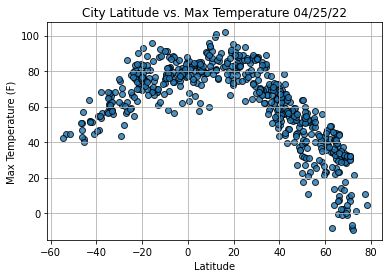

In [49]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

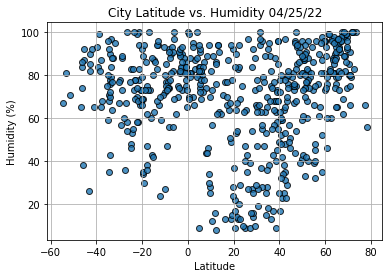

In [50]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

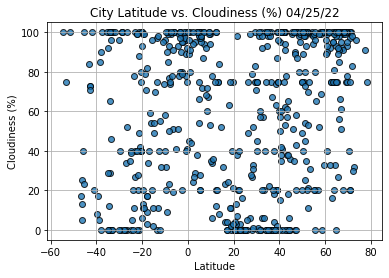

In [51]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

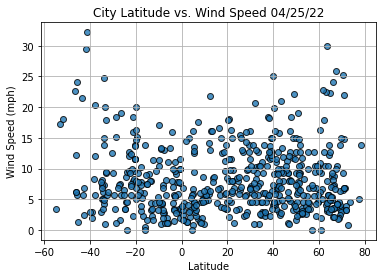

In [52]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()